# Internship on Data Science at InfraBIM
**DS-09:Assignment-Project - Build, Train and Deploy Machine Learning Model on AWS Cloud**

Team No.:5063<br>
Reg. No.:5063<br>
Name:BODIPU TARUN KUMAR<br>
Date:30/01/2023

In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
movies = pd.read_csv('https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/5063_Movies.csv')
print("movies_shape:",movies.shape)
ratings = pd.read_csv('https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/5063_Movie_Ratings.csv')
print("ratings_shape:",ratings.shape)

movies_shape: (1682, 2)
ratings_shape: (100003, 4)


In [3]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
final_data=ratings.pivot(index='item_id',columns='user_id',values='rating')
final_data.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
final_data=final_data.fillna(0)
final_data.shape

(1682, 944)

In [7]:
final_data.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_merge=pd.merge(movies,ratings,on='item_id')
df_merge.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [10]:
df_merge.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [11]:
df_merge.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
rating=pd.DataFrame(df_merge.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
rating['count_rating']=pd.DataFrame(df_merge.groupby('title')['rating'].count())
rating.head()

,rating,count_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot: >

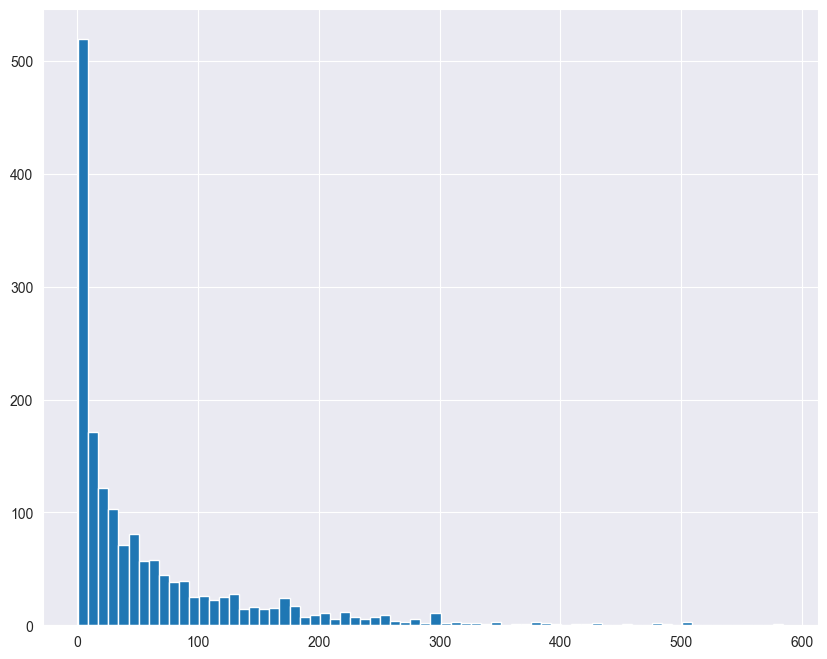

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
rating['count_rating'].hist(bins=70)

<AxesSubplot: >

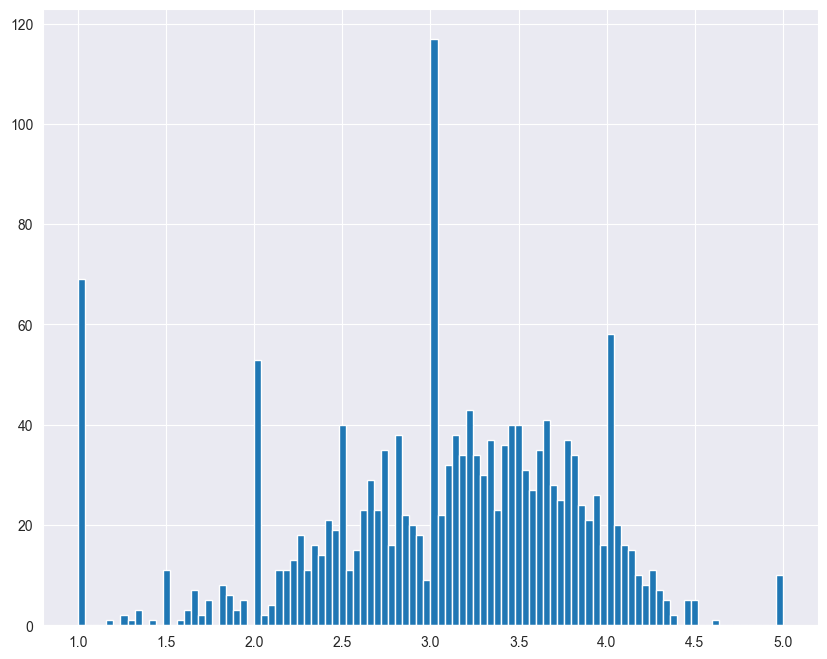

In [15]:
plt.figure(figsize=(10,8))
rating['rating'].hist(bins=100)

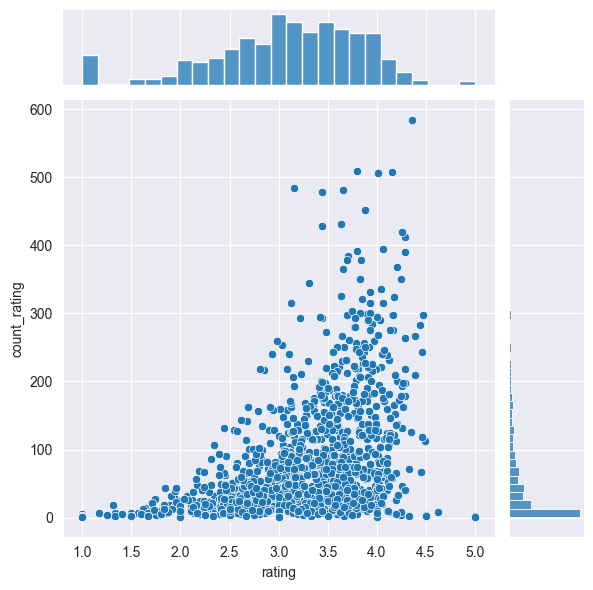

In [16]:
sns.jointplot(x='rating',y='count_rating',data=rating)

In [17]:
no_user_voted=ratings.groupby('item_id')['rating'].agg('count')
no_movies_voted=ratings.groupby('user_id')['rating'].agg('count')

In [18]:
final_data.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
final_data=final_data.loc[no_user_voted[no_user_voted > 10].index,:]
final_data
final_data=final_data.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_data

user_id,1,2,3,5,6,7,8,10,11,12,...,930,931,932,933,934,936,938,940,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,...,3.0,0.0,4.0,3.0,2.0,4.0,4.0,0.0,0.0,0.0
2,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,3.0,5.0,0.0,0.0,2.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
csr_data= csr_matrix(final_data.values)
final_data.reset_index(inplace=True)

In [21]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [22]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['item_id']
        movie_idx = final_data[final_data['item_id'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_data.iloc[val[0]]['item_id']
            idx = movies[movies['item_id'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [23]:
get_movie_recommendation('Star Wars')

,Title,Distance
1,"Princess Bride, The (1987)",0.265732
2,Independence Day (ID4) (1996),0.260290
3,Back to the Future (1985),0.255951
4,Fargo (1996),0.246130
5,Indiana Jones and the Last Crusade (1989),0.242353
6,"Silence of the Lambs, The (1991)",0.241364
7,Toy Story (1995),0.221558
8,"Empire Strikes Back, The (1980)",0.176013
9,Raiders of the Lost Ark (1981),0.158039
10,Return of the Jedi (1983),0.094442
